In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.legend_handler import HandlerTuple
from astropy.table import Table


plt.style.use('../../../format.mplstyle')

In [16]:
def load_table(data_file):
    table = Table.read(data_file, format='ascii',names=('MJD','lum','dlum'))
    return table 

In [17]:
hgw = load_table('hgw_bol_LC')
jfo = load_table('jfo_bol_LC')
jww = load_table('jww_bol_LC')
rth = load_table('rth_bol_LC')

In [18]:
print(len(hgw))

142


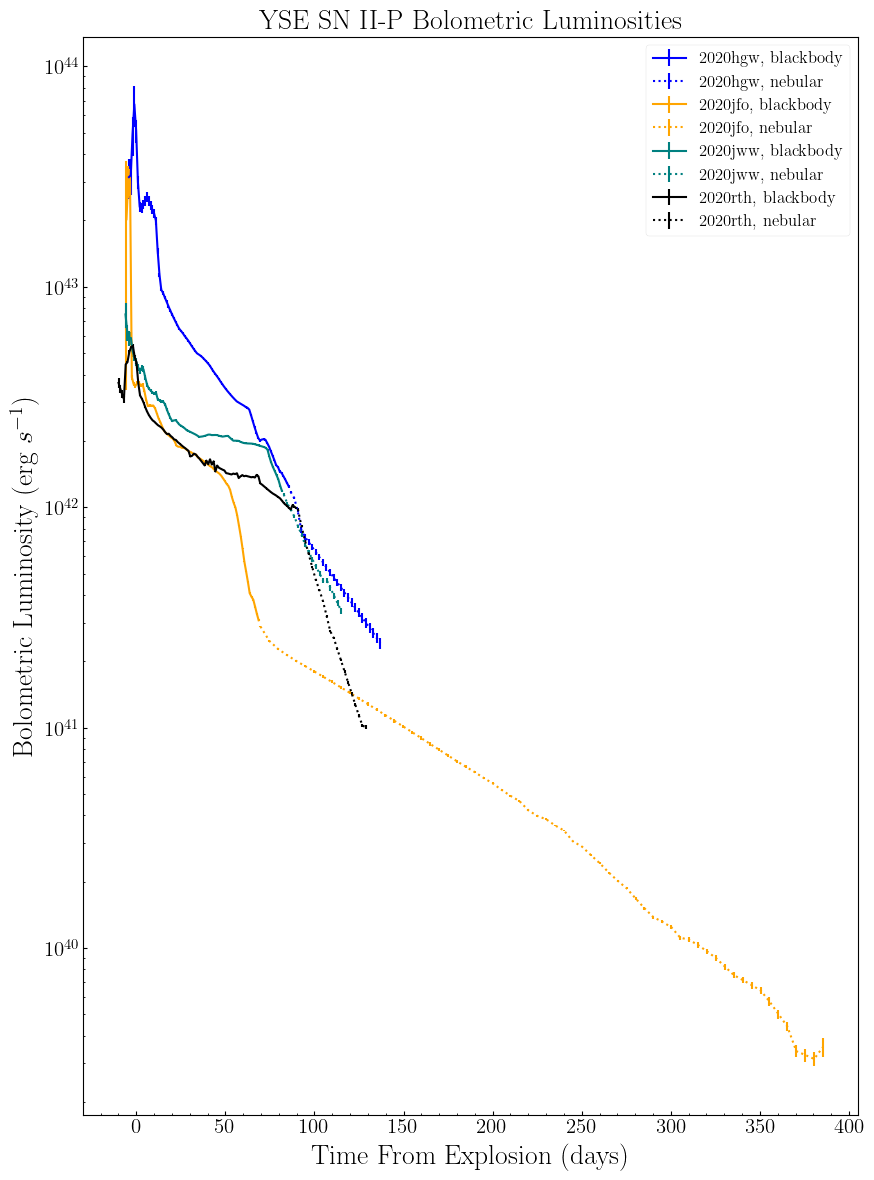

In [46]:
fig, ax = plt.subplots(figsize=(10,14))

legend_tuples = []
legend_tuples = []

hgw_line = ax.errorbar(hgw['MJD'][:90], hgw['lum'][:90], yerr = hgw['dlum'][:90], color = 'b', label = '2020hgw, blackbody')
hgw_line_neb = ax.errorbar(hgw['MJD'][90:142:2], hgw['lum'][90:142:2], yerr = hgw['dlum'][90:142:2], color='b', linestyle ='dotted', label = '2020hgw, nebular')
jfo_line = ax.errorbar(jfo['MJD'][:75], jfo['lum'][:75], yerr = jfo['dlum'][:75], color = 'orange', label = '2020jfo, blackbody')
jfo_line_neb = ax.errorbar(jfo['MJD'][75::5], jfo['lum'][75::5], yerr = jfo['dlum'][75::5], color = 'orange', linestyle = 'dotted', label = '2020jfo, nebular')
jww_line = ax.errorbar(jww['MJD'][:88], jww['lum'][:88], yerr = jww['dlum'][:88], color = 'teal', label = '2020jww, blackbody')
jww_line_neb = ax.errorbar(jww['MJD'][88::2], jww['lum'][88::2], yerr = jww['dlum'][88::2], linestyle = 'dotted', color = 'teal', label = '2020jww, nebular')
rth_line = ax.errorbar(rth['MJD'][:100], rth['lum'][:100], yerr = rth['dlum'][:100], label = '2020rth, blackbody', color = 'k')
rth_line_neb = ax.errorbar(rth['MJD'][100::2], rth['lum'][100::2], yerr = rth['dlum'][100::2], linestyle = 'dotted',label = '2020rth, nebular', color = 'k')

ax.set_yscale('log')
ax.legend(fontsize = 'large')
ax.set_xlabel('Time From Explosion (days)', fontsize = 20)
ax.set_ylabel('Bolometric Luminosity (erg $s^{-1}$)', fontsize = 20)
ax.set_title('YSE SN II-P Bolometric Luminosities', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=15)



In [53]:
neb_dict = {
    '2020hgw': [90, 142, 2],
    '2020jfo': [75, -1, 5],
    '2020jww': [88, 100, 2],
    '2020rth': [100, -1, 2]}

colors = {
    '2020hgw': 'b',
    '2020jfo': 'orange',
    '2020jww': 'teal',
    '2020rth': 'k'}

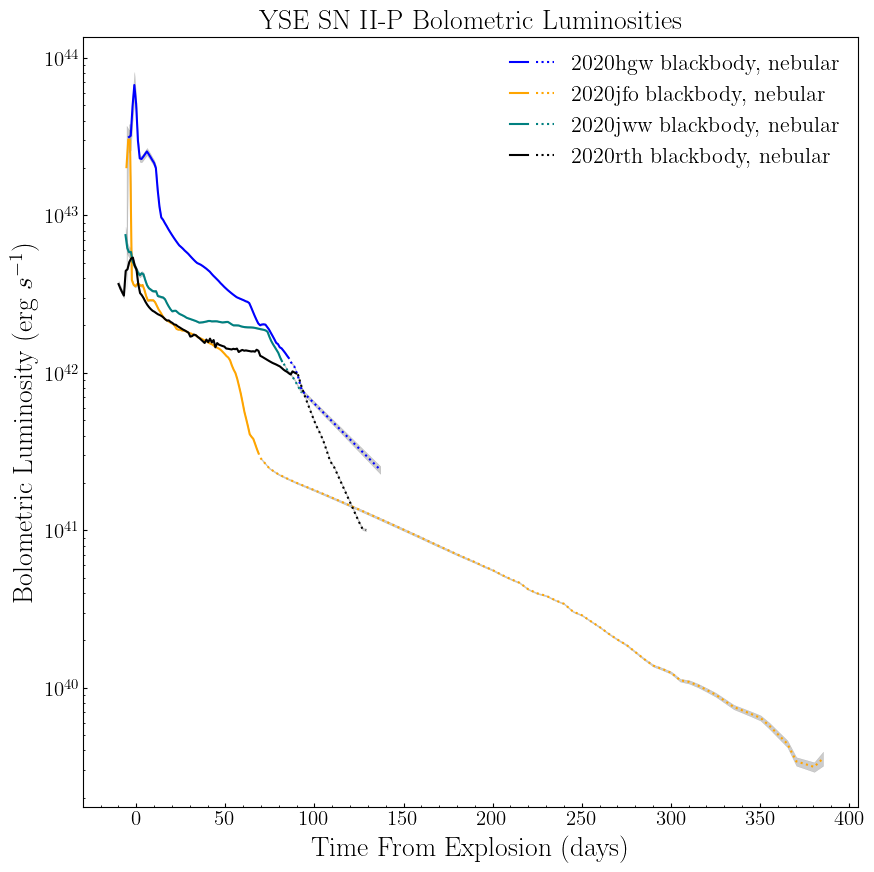

In [56]:
fig, ax = plt.subplots(figsize=(10,10))

label_tuples = []
legend_desc = ['2020hgw blackbody, nebular', 
               '2020jfo blackbody, nebular', 
               '2020jww blackbody, nebular', 
               '2020rth blackbody, nebular']

for i, data in enumerate([hgw, jfo, jww, rth]):
    name = list(neb_dict.keys())[i]
    start, end, step = neb_dict[name]
    color = colors[name]

    # hgw_line = ax.plot(hgw['MJD'][:90], hgw['lum'][:90],
    #                    color = 'b', label = '2020hgw, blackbody')
    # hgw_line_neb = ax.plot(hgw['MJD'][90:142:2], hgw['lum'][90:142:2],
    #                         color='b', linestyle ='dotted', label = '2020hgw, nebular')
    # ax.fill_between(hgw['MJD'][:90], hgw['lum'][:90]-hgw['dlum'][:90], hgw['lum'][:90]+hgw['dlum'][:90],
    #                     color='k', alpha=0.2)
    # ax.fill_between(hgw['MJD'][90:142:2], hgw['lum'][90:142:2]-hgw['dlum'][90:142:2], hgw['lum'][90:142:2]+hgw['dlum'][90:142:2],
    #                     color='k', alpha=0.2)
    
    line = ax.plot(data['MJD'][:start], data['lum'][:start], color = color)
    line_neb = ax.plot(data['MJD'][start:end:step], data['lum'][start:end:step], 
                       color = color, linestyle = 'dotted')
    ax.fill_between(data['MJD'][:start], data['lum'][:start]-data['dlum'][:start], data['lum'][:start]+data['dlum'][:start],
                     color='k', alpha=0.2)
    ax.fill_between(data['MJD'][start:end:step], data['lum'][start:end:step]-data['dlum'][start:end:step], data['lum'][start:end:step]+data['dlum'][start:end:step],
                     color='k', alpha=0.2)
    
    label_tuples.append( (line[0], line_neb[0]) )

ax.set_yscale('log')
ax.set_xlabel('Time From Explosion (days)', fontsize = 20)
ax.set_ylabel('Bolometric Luminosity (erg $s^{-1}$)', fontsize = 20)
ax.set_title('YSE SN II-P Bolometric Luminosities', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.legend(label_tuples, legend_desc, ncol=1,
           handler_map={tuple: HandlerTuple(ndivide=2, pad=0.4)}, loc='upper right',
           markerscale=1.0, borderpad=0.3, columnspacing=1.5, 
           fontsize=16, frameon=False)
